# Summary

Performed EDA, data preprocessing, feature transformation.\
Applied 6 models:
* OLS
- SGD regressor
* Elastic Net
* Ridge 
* Lasso
* SVR


# 1. Import Packages, data, and view summary statistics.

In [ ]:
# Import Packages. 

import numpy as np
import pandas as pd
import scipy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [ ]:
# Import test and training datasets.
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv", encoding='latin-1') #the given training dataset from Kaggle
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv", encoding='latin-1') #the true testing dataset using for submission score

In [ ]:
# Use head to return first five rows and ensure that importing was done correctly. 
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Use head to return first five rows and ensure that importing was done correctly. 
test.head() #Note that the test dataset is used for submission score. The column SalePrice is excluded. 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Get info on our training dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.shape #1460 rows, 81 columns

(1460, 81)

# 2. Data exploration and EDA

# Check forduplicates

In [ ]:
train[train.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


No duplicates!

## Visualizign distributions

look for outliers

In [ ]:
#%matplotlib inline#
#import   matplotlib.pyplot as plt
#train.select_dtypes(include = ["int64", "float64"]).hist(bins  = 50,figsize   = (40,35))
#plt.show()

It can be seen that some variables are skewed. However, *Skewness in explanatory  variables is irrelevant in linear regression, what we  should  be   looking at  is the skewness in: 1.The output  variable. 2. The  relationship between x and y.

As it's observed, some features contain outliers, this is wht I'll use Standard scaler , later on, instead of MinMax scaler

1.  Categorical, not ordinal: MSZoning, Street, Alley(HAS NA), LotShape, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st,Exterior2nd, MasVnrType(has  None), Foundation, Heating, CentralAir, Electrical, Functional, GarageType, GarageFinish, PavedDrive, MiscFeature, SaleType, SaleCondition

2.  Categorical, ordinal: LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond,BsmtExposure, BsmtFinType1, BsmtFinType2, KitchenQual, HeatingQC,FireplaceQu, GarageQual, GarageCond, PoolQC, Fence(NA), 

3. numerical, ordinal: OverallQual, OverallCond: 1-10, Mssubclass
                    
     YearBuilt(label then OHE), YearRemodAdd, GarageYrBlt


# Visualize the output variable

Text(0.5, 1.0, 'Sale Price distribution')

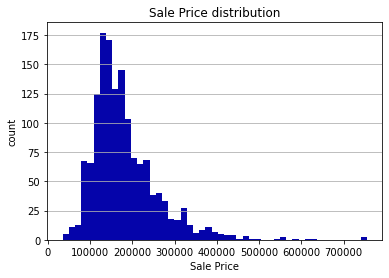

In [ ]:
import matplotlib.pyplot as plt
n, bins, batches  = plt.hist(x= train["SalePrice"], bins="auto", color = '#0504aa')
plt.grid(axis ="y")
plt.xlabel("Sale Price")
plt.ylabel("count")
plt.title("Sale Price distribution")

SalePrice is right skewed, therefore, we need to take the log of the sales. A log transformation would reduce the effect of the outliers and result in a (almost) normaly distributed sales

Text(0.5, 1.0, 'Sale Price distribution')

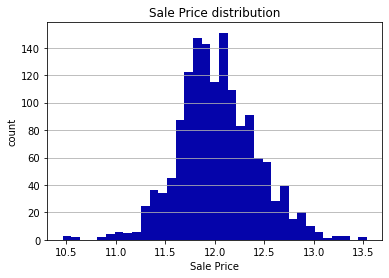

In [ ]:
import matplotlib.pyplot as plt
n, bins, batches  = plt.hist(x= np.log(train["SalePrice"]), bins="auto", color = '#0504aa')
plt.grid(axis ="y")
plt.xlabel("Sale Price")
plt.ylabel("count")
plt.title("Sale Price distribution")


In [ ]:
# y_train = np.log1p(train["SalePrice"] )


### Check for null values

In [ ]:
df_train_num = train.select_dtypes(include = ["int64", "float64"])
df_train_cat = train.select_dtypes(include = "object")
df_test_num = test.select_dtypes(include = ["int64", "float64"])
df_test_cat = test.select_dtypes(include = "object")


In [ ]:
df_train_cat.isnull().sum() /  1460  


MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

In [ ]:
df_train_num.isnull().sum() /  1460  

Id               0.000000
MSSubClass       0.000000
LotFrontage      0.177397
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.055479
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SalePrice        0.000000
dtype: float

In [ ]:
merged_data = train.append(test)

In [ ]:
merged_data = merged_data.drop(['Id'], axis=1)

# Filling null values

### Categorical



GarageType 0.055479

GarageFinish 0.055479

GarageQual 0.055479

GarageCond 0.055479

BsmtQual 0.025342

BsmtCond 0.025342

BsmtExposure 0.026027

BsmtFinType1 0.025342

BsmtFinType2 0.026027

MasVnrType ,

clearly, garage data isn't an error, the house simply doesn't have a garage. same applies to the Basement and the MasVnrType

In [ ]:
none_col = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond', 'MasVnrType']

merged_data[none_col] = merged_data[none_col].fillna("None")
merged_data[none_col] = merged_data[none_col].fillna("None")

we still have the Electrical column to fill. Intuitively, every house must have an electrical system. So we'll fill it with the mode

In [ ]:
merged_data["Electrical"].fillna(merged_data["Electrical"].mode()[0], inplace= True)

### numerical:

MasVnrArea 0.005479 

Lotfrontage .17

Garageyrblt

If GarageYrBlt was chronologically ordered in the data, we would fill it with the previous value, but since this isn't the case, I chose to fill it with the mode

In [ ]:

merged_data["GarageYrBlt"].fillna(merged_data["GarageYrBlt"].mode()[0], inplace = True)


In [ ]:

merged_data["MasVnrArea"].fillna(merged_data["MasVnrArea"].mode()[0], inplace = True)

# filling with median because it has outliers

Note that each feature has 1460 entries. We observe that 'Alley', 'PoolQC', and 'MiscFeature' are missing >90% of cases in both datasets. We can proceed by dropping these columns.
We can also drop the ID column, which doesn't provide any value other than identifying a unique row.

In [ ]:
merged_data.drop(columns = ["Alley", "FireplaceQu", "PoolQC" , "Fence", "MiscFeature","LotFrontage"], inplace = True)


In [ ]:
# train

Next, for ordinal columns and numeric columns, we repalce NA with 0.

# Next, for ordinal columns that are not stored in a numeric format, such as ExterCond and BsmtQual, we use OrdinalEncoder to encode them instead of just dummies. 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = ce.OrdinalEncoder(cols =["LandSlope"] )
a = encoder.fit(train)
a

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


OrdinalEncoder(cols=['LandSlope'],
               mapping=[{'col': 'LandSlope', 'data_type': dtype('O'),
                         'mapping': Gtl    1
Mod    2
Sev    3
NaN   -2
dtype: int64}])

In [ ]:
ordinal_cols = ["LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "KitchenQual", "HeatingQC", "GarageQual", "GarageCond"]


encoder = ce.OrdinalEncoder(cols=ordinal_cols)
merged_data = encoder.fit_transform(merged_data)

In [ ]:
train["LandSlope"].isnull().sum()

0

# Future work: encoding the data by providng a dictionary.
Ordinal encoding uses a single column of integers to represent the classes. An optional mapping dict can be passed in; in this case, we use the knowledge that there is some true order to the classes themselves. Otherwise, the classes are assumed to have no true order and integers are selected at random.


In [ ]:
merged_data.head()

NameError: ignored

# Preparing the data for linear regression

## Feature selection

### Multicollinearity

one of the linear regression's assumptions: there isn't colinearity between input features

In [ ]:
# Next, we can create a correlation matriz for our quantitative variables and determine if any variables are highly correlated.

train =  merged_data.iloc[:len(train)]
train_quant=train.select_dtypes(exclude  = ["object"])


In [ ]:
# Determine strong pairs:

cor_pairs = train_quant.corr().unstack()
strong_pairs = cor_pairs[((cor_pairs) > 0.8) & ((cor_pairs) < 1.0)]
strong_pairs
# Here are variables that are contenders to be cut due to being close to perfectly correlated:

TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
GarageQual    GarageCond      0.838396
GarageCond    GarageQual      0.838396
dtype: float64

In [ ]:
# For these variables, the best alternative would be to drop one of the highly correlated variables.
# Dropping '1stFlrSF', 'GarageArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageCond'



merged_data = merged_data.drop(["1stFlrSF", "TotRmsAbvGrd", "GarageArea"], axis = 1)

Let's also take a look at what variables are most correlated with our dependent variable 'SalesPrice'. 


In [ ]:
corr_matrix = merged_data.corr()
corr_matrix["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
TotalBsmtSF      0.613581
FullBath         0.560664
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.397778
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
BsmtExposure     0.132027
ScreenPorch      0.111447
PoolArea         0.092404
LandSlope        0.051152
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
BsmtFinType2    -0.078128
BsmtQual        -0.080199
MSSubClass      -0.084284
KitchenQual     -0.114746
ExterCond       -0.121706
EnclosedPorch   -0.128578
KitchenAbvGr

In [ ]:
# # Let's also take a look at what variables are most correlated with our dependent variable 'SalesPrice'. 

# sales_cor = train.corr('pearson').abs()['SalePrice']

# # Sort by strongest correlations. 
# sorted_cor_target = sales_cor.sort_values(kind = 'Quicksort', ascending=False)
# sorted_cor_target

the multicollinearity still exists in various features. However, we will keep them for now for the sake of learning and let the models(e.x. Regularization models such as Lasso, Ridge)

# 1. Linear regression

## Let's   talk about linear regression:

Regression has the following assumptions:

  Linear relationship
  
  reasonable  variations in the values of the explanatory variable
  
  No or little multicollinearity
  
  No auto-correlation
  
  Homoscedasticity (all variables have same variance)



# Transformations

### Categorical Variables: Transforming to Dummy Variables 

For categorical, ordinal features, I'll use label encoding, then OHE

For categorical nominal >> OHE

for numerical >> OHE

### In previous steps, we have transformed ordinal data by OrdinalEncoding
### For the rest categorical features, we one-hot encode them

In [ ]:
cat_cols = merged_data.select_dtypes(include = ["object"]).columns
dummy_cols = []
for col in cat_cols:
    if col not in ordinal_cols:
        dummy_cols.append(col)
merged_data = pd.get_dummies(merged_data, columns = dummy_cols)
    
Train = merged_data.iloc[:len(train)]
Test  = merged_data.iloc[:len(test)].drop("SalePrice", axis=1)

In [ ]:
# # In previous steps, we have transformed ordinal data by OrdinalEncoding
# # For the rest categorical features, we create one-hot encode them
# object_cols = merged_data.select_dtypes(include=['object']).columns
# dummy_cols = []
# for col in object_cols:
#     if col not in ordinal_cols:
#         dummy_cols.append(col)
# merged_data = pd.get_dummies(merged_data, columns = dummy_cols) 

# Train = merged_data.iloc[:len(train)]
# Test = merged_data.iloc[len(train):].drop("SalePrice", axis = 1)

### Examine the preprocessed dataset

In [ ]:
Train.head()

,MSSubClass,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,1,7,5,2003,2003,196.0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,1,6,8,1976,1976,0.0,2,1,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,1,7,5,2001,2002,162.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,1,7,5,1915,1970,0.0,2,1,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,1,8,5,2000,2000,350.0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Train["MSZoning"]

In [ ]:
Test.head()

,MSSubClass,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,1,7,5,2003,2003,196.0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,1,6,8,1976,1976,0.0,2,1,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,1,7,5,2001,2002,162.0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,1,7,5,1915,1970,0.0,2,1,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,1,8,5,2000,2000,350.0,1,1,...,0,0,0,1,0,0,0,0,1,0


# 3. Model building and feature selection

## Model 1 - Linear Regression

First, drop features with very low correlation with SalePrice (<0.020)

In [ ]:
quant_features = list((Train.dtypes != 'object')[Train.dtypes != 'object'].index)
low_cor_features = set()
for i in quant_features:
    if abs(Train[i].corr(Train["SalePrice"])) < 0.02:
        low_cor_features.add(i)
low_cor_features

{'BldgType_TwnhsE',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Exterior1st_Plywood',
 'Exterior2nd_Stone',
 'Foundation_Stone',
 'Foundation_Wood',
 'Functional_Mod',
 'Functional_Sev',
 'LotConfig_Corner',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_Blmngtn',
 'Neighborhood_SawyerW',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofStyle_Flat',
 'RoofStyle_Mansard',
 'SaleCondition_Alloca',
 'SaleType_CWD',
 'SaleType_ConLI',
 'Utilities_AllPub',
 'Utilities_NoSeWa'}

In [ ]:
# Create data copies for model 1, and drop the low correlation features
train1 = Train.copy()
test1 = Test.copy()
train1 = train1.drop(columns = low_cor_features)
test1 = test1.drop(columns = low_cor_features)

In [ ]:
train1

,MSSubClass,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,1,7,5,2003,2003,196.0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,1,6,8,1976,1976,0.0,2,1,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,1,7,5,2001,2002,162.0,1,1,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,1,7,5,1915,1970,0.0,2,1,...,0,0,0,0,1,1,0,0,0,0
4,60,14260,1,8,5,2000,2000,350.0,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,1,6,5,1999,2000,0.0,2,1,...,0,0,0,0,1,0,0,0,1,0
1456,20,13175,1,6,6,1978,1988,119.0,2,1,...,0,0,0,0,1,0,0,0,1,0
1457,70,9042,1,7,9,1941,2006,0.0,3,2,...,0,0,0,0,1,0,0,0,1,0
1458,20,9717,1,5,6,1950,1996,0.0,2,1,...,0,0,0,0,1,0,0,0,1,0


Do a train/validation split for the training data

In [ ]:
X_train = train1.drop("SalePrice", axis = 1)
Y_train = np.log1p(train["SalePrice"] )
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size = 0.2,random_state=42)

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
x_train.shape

(1168, 195)

For this feature selection method, we retained 193 features.

In [ ]:
len(x_train.columns)

195

# Model1: Linear regression

Fit linear regression 

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

linear_pred = linreg.predict(x_valid)

r2 = linreg.score(x_valid, y_valid)
print("coefficient of determination: %.2f" % r2)
print("adjusted R-square: %.2f" % (1 - (1-r2)*(len(y_valid)-1)/(len(y_valid)-x_valid.shape[1]-1)))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid,linear_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid,linear_pred)))

coefficient of determination: 0.90
adjusted R-square: 0.69
Mean Squared Error: 0.018949508459128035
Root Mean Squared Error: 0.13765721361094024


Plot predicted value vs. actual value

Text(0, 0.5, 'Predicted Sale Price')

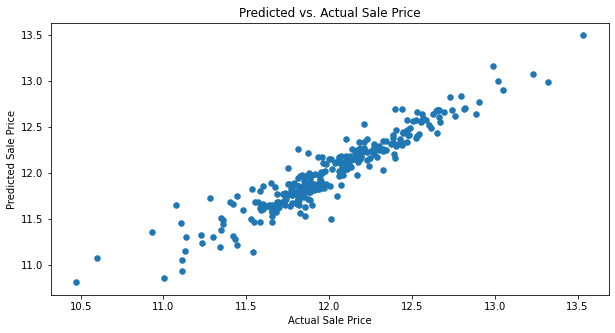

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_valid, linear_pred, s=30)
plt.title('Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

#plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)])
#plt.tight_layout()

Create Submission File for Model 1 - Linear Regression

In [ ]:
y_pred = linreg.predict(test1)
y_pred = np.exp(1)**y_pred

y_test = pd.DataFrame(y_pred, columns=['SalePrice'])

test_results = pd.concat([test['Id'],y_test['SalePrice']], axis = 1)

test_results.to_csv('rf_output_model1.csv', index=False)

# Model 2 - SGDRegressor

SGDRegressor is  a  Linear model fitted by minimizing a regularized empirical loss with SGD

Some  of  the   mainn  differennces   :
1. SGD Regressor uses GD to find the parameters
2. SGD regressor doesn't use MSE, because it needs to know the direction of the error in order to adjust the line properly.

In [ ]:
type(y_train)

pandas.core.series.Series

# SGD preparation

Since the algorithm depends on Gradient descent, numerical features must be scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train.select_dtypes(include =  ["int64", "float64"])) #.select_dtypes(include =  ["int64", "float64"])
x_train_scaled = scaler.transform(x_train.select_dtypes(include =  ["int64", "float64"]))
scaler = StandardScaler().fit(x_valid.select_dtypes(include =  ["int64", "float64"]))
x_valid_scaled = scaler.transform(x_valid.select_dtypes(include =  ["int64", "float64"]))

In [ ]:
x_train_scaled

array([[-0.8667643 , -0.21289571, -0.22171142, ..., -0.09274033,
        -0.13341669,  1.65006527],
       [ 0.07410996, -0.26524463, -0.22171142, ..., -0.09274033,
        -0.5080097 ,  0.89367742],
       [-0.63154574, -0.17784146, -0.22171142, ..., -0.09274033,
        -0.5080097 ,  0.13728958],
       ...,
       [-0.8667643 , -0.23409563, -0.22171142, ..., -0.09274033,
        -0.88260272, -1.37548612],
       [-0.16110861, -0.28337613, -0.22171142, ..., -0.09274033,
        -0.13341669, -0.61909827],
       [ 1.48542135, -0.65139925, -0.22171142, ..., -0.09274033,
        -0.13341669,  0.89367742]])

In [ ]:
from sklearn.linear_model  import SGDRegressor
from sklearn.metrics import  mean_absolute_error
# The default loss funnction is ‘squared_loss’, which refers to the ordinary least squares fit in Model 1. 
SGDreg   =  SGDRegressor(random_state = 42)
SGDreg.fit(x_train_scaled, y_train.ravel())
y_pred=SGDreg.predict(x_valid_scaled)

print(' Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, (y_pred))))
print(' Mean absolute Error:', np.sqrt(metrics.mean_squared_error(y_valid, (y_pred))))


 Mean Squared Error: 0.16116794278371105
 Mean absolute Error: 0.16116794278371105


### Q: The default loss funnction is ‘squared_loss’, which refers to the ordinary least squares fit in Model 1. Shouldn't the loss from both models be the same??

Text(0, 0.5, 'Predicted Sale Price')

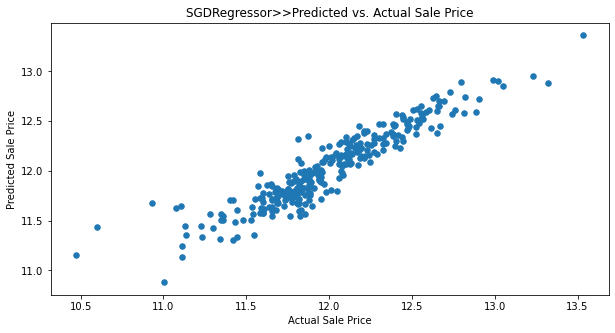

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_valid, y_pred, s=30)
plt.title('SGDRegressor>>Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

#plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)])
#plt.tight_layout()

It's clear that the results   of both SGD and OLS are very close.  This is because The default loss funnction is ‘squared_loss’, which refers to the ordinary least squares fit in Model 1. 

## Trying different learning rates

learning_rate string, default=’invscaling’

The learning rate schedule:

‘constant’: eta = eta0

‘optimal’: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.

‘invscaling’: eta = eta0 / pow(t, power_t)

‘adaptive’: eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.


In [ ]:
from sklearn.linear_model  import SGDRegressor
from sklearn.metrics import  mean_absolute_error
# The default loss funnction is ‘squared_loss’, which refers to the ordinary least squares fit in Model 1. 
SGDreg   =  SGDRegressor(learning_rate = "constant", eta0 = 0.1, random_state = 42)
SGDreg.fit(x_train_scaled, y_train)
y_pred=SGDreg.predict(x_valid_scaled)

print(' Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))


print(' Mean absolute Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))


 Mean Squared Error: 2513421699689.6484
 Mean absolute Error: 2513421699689.6484


Woah! that's a huge error! looks like a 0.1 learning rate along with a large number of features makes the model take steps further away from the true y values. Let's try a smaller learning rate.

Text(0, 0.5, 'Predicted Sale Price')

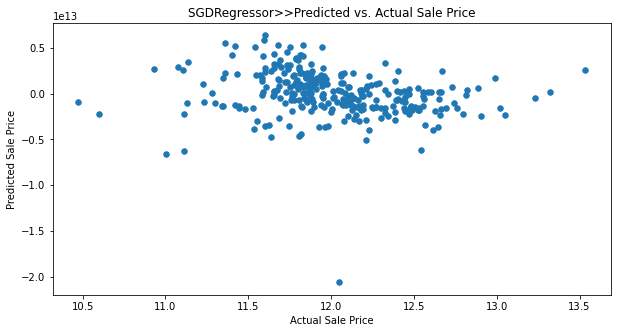

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_valid, y_pred, s=30)
plt.title('SGDRegressor>>Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

#plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)])
#plt.tight_layout()

In [ ]:
from sklearn.linear_model  import SGDRegressor
from sklearn.metrics import  mean_absolute_error
# The default loss funnction is ‘squared_loss’, which refers to the ordinary least squares fit in Model 1. 
SGDreg   =  SGDRegressor(learning_rate = "constant", eta0 = 0.001, random_state = 42)
SGDreg.fit(x_train_scaled, y_train)
y_pred=SGDreg.predict(x_valid_scaled)

print(' Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))


print(' Mean absolute Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))


 Mean Squared Error: 0.157609485717415
 Mean absolute Error: 0.157609485717415


#### Trying the ADAPTIVE learning rate
‘adaptive’: eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.

In [ ]:
from sklearn.linear_model  import SGDRegressor
from sklearn.metrics import  mean_absolute_error
# The default loss funnction is ‘squared_loss’, which refers to the ordinary least squares fit in Model 1. 
SGDreg   =  SGDRegressor(learning_rate = "adaptive", eta0 = 0.001, random_state = 42)
SGDreg.fit(x_train_scaled, y_train)
y_pred=SGDreg.predict(x_valid_scaled)

print(' Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))


print(' Mean absolute Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))


 Mean Squared Error: 0.15812079099559612
 Mean absolute Error: 0.15812079099559612


There isn't a clear difference between adaptive and constant learning rate at eta0=.001, This could mean that the model didn't reach 5 epochs without learning, so both methods ended up being equivalent.

Text(0, 0.5, 'Predicted Sale Price')

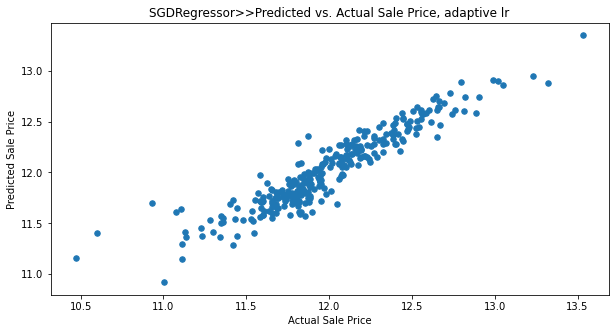

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_valid, y_pred, s=30)
plt.title('SGDRegressor>>Predicted vs. Actual Sale Price, adaptive lr')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

#plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)])
#plt.tight_layout()

# loss function??

HowtokowifSGDisoverfittig

# 3. Ridge regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

The complexity parameter controls the amount of shrinkage: the larger the value of , the greater the amount of shrinkage .



In [ ]:
from sklearn.linear_model import Ridge, Lasso


parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}

ridge = GridSearchCV(Ridge(), parameters, cv = 10, n_jobs=-1, verbose=1)

ridge.fit(x_train, y_train)

print('Best Model Parameters:', ridge.best_params_)
print('R2 score:', ridge.best_score_)




Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Model Parameters: {'alpha': 10.0}
R2 score: 0.8530570278924514


In [ ]:

ridge=Ridge(alpha= 10,random_state=42)

ridge.fit(x_train,y_train)

Ridge(alpha=10, random_state=42)

In [ ]:
y_pred_ridge=ridge.predict(x_valid)

In [ ]:
print("R2score:   ",ridge.score(x_valid,    y_valid))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_ridge)))

R2score:    0.8993406968863343
Mean Squared Error: 0.018784132064724103
Root Mean Squared Error: 0.13705521538680715


Text(0, 0.5, 'Predicted Sale Price')

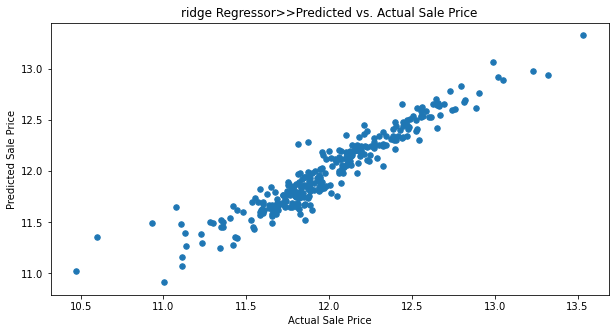

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_valid, y_pred_ridge, s=30)
plt.title('ridge Regressor>>Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

#plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)])
#plt.tight_layout()

It's clear that the first 3 left points are better approximated using ridge, this could be explained by the penalty that the ridge introduced which "loosened" the linear model and resulted in better generalization

# 4. Lasso regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet


parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}

lasso = GridSearchCV(Lasso(), parameters, cv = 10, n_jobs=-1, verbose=1)

lasso.fit(x_train, y_train)

print('Best Model Parameters:', lasso.best_params_)
print('R2 score:', lasso.best_score_)




Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Model Parameters: {'alpha': 0.001}
R2 score: 0.8497315303294155


In [ ]:
lasso=Lasso(alpha = .001)
lasso.fit(x_train, y_train)
y_pred_lasso=lasso.predict(x_valid)

In [ ]:
print("R2score:   ",lasso.score(x_valid,    y_valid))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_lasso)))

R2score:    0.8910617255087339
Mean Squared Error: 0.02032907909799842
Root Mean Squared Error: 0.14258007959739122


The error in Lasso is slightly larger than Ridge, perhabs this is because Lasso uses the L1 norm, while Ridge uses a more aggressive regularization methid: L2 norm. With the large number of features, aggressive reg. is expected to perform better and decrease overfitting

# Q: why does the error increase when I increase alpha??

# 5. ElasticNet

Linear regression with combined L1 and L2 priors as regularizer.

In [ ]:
elastic =  ElasticNet(alpha = .001)
elastic.fit(x_train, y_train)
y_pred_el= elastic.predict(x_valid)

In [ ]:
print("R2score:   ",elastic.score(x_valid,    y_valid))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred_el))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_el)))

R2score:    0.8982862479831502
Mean Squared Error: 0.018980903816963917
Root Mean Squared Error: 0.13777120097089926


# 6. SVR

SVR is a distance-based algorithm, so we must use scaled features.(if we do not scale all features to comparable ranges, the features with the alrgest range will completely dominate in the computation of the kernel matrix)

In [ ]:
 from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel = "linear")
svr.fit(x_train_scaled, y_train)
y_pred_svr = svr.predict(x_valid_scaled)

In [ ]:

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_svr)))

Mean Squared Error: 0.021427036030402025
Root Mean Squared Error: 0.14637976646518475


### rbf kernel

In [ ]:
svr = SVR(kernel = "rbf")
svr.fit(x_train_scaled, y_train)
y_pred_svr = svr.predict(x_valid_scaled)

In [ ]:

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_svr)))

Mean Squared Error: 0.03581058859413011
Root Mean Squared Error: 0.18923685844499244


In [ ]:
svr = SVR(kernel = "poly")
svr.fit(x_train_scaled, y_train)
y_pred_svr = svr.predict(x_valid_scaled)

In [ ]:

print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_svr)))

Mean Squared Error: 0.029932444272610107
Root Mean Squared Error: 0.17300995425873653


linear kernel resulted in the lowes error. maybe this indicats that the relationship between y and X's is linear and there isn't a need for a non-linear kernel

# < The end >